In [27]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from tyre import Tyre, estimate_wear
from clean import clean_laps
from fuel import estimate_time_lost
import fastf1

# Grand prix de Belgique

In [ ]:
session = fastf1.get_session(2022, 'Belgium', 'R', )
session.load(telemetry=True, laps=True, weather=True)
laps = session.laps

In [35]:
drivers = laps.Driver.unique()

Information générale
* Nombre de tour: 50
* Nombre de pilote au départ: 20

In [36]:
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,14.0,NaT,NaT,NaT,0 days 01:25:52.894000,Finished,26.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,2.0,2.0,NaT,NaT,NaT,0 days 01:26:10.735000,Finished,18.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,3.0,1.0,NaT,NaT,NaT,0 days 01:26:19.780000,Finished,15.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,4.0,5.0,NaT,NaT,NaT,0 days 01:26:22.034000,Finished,12.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,5.0,3.0,NaT,NaT,NaT,0 days 01:27:06.150000,Finished,10.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,6.0,15.0,NaT,NaT,NaT,0 days 01:27:07.830000,Finished,8.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,7.0,16.0,NaT,NaT,NaT,0 days 01:27:08.534000,Finished,6.0
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,8.0,10.0,NaT,NaT,NaT,0 days 01:27:11.001000,Finished,4.0
10,10,P GASLY,GAS,AlphaTauri,4e7c9b,Pierre,Gasly,Pierre Gasly,9.0,0.0,NaT,NaT,NaT,0 days 01:27:25.075000,Finished,2.0
23,23,A ALBON,ALB,Williams,37bedd,Alexander,Albon,Alexander Albon,10.0,6.0,NaT,NaT,NaT,0 days 01:27:34.794000,Finished,1.0


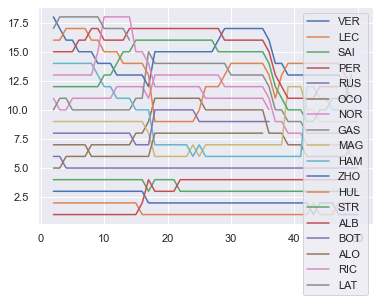

In [30]:
laps["Pos"] = laps.groupby("LapNumber")["LapStartTime"].rank()
for driver in drivers:
    laps_driver = laps.query(f"Driver == '{driver}' and LapNumber > 1")
    plt.plot(laps_driver.LapNumber, laps_driver.Pos, label=driver)
plt.legend()
plt.show()

KeyError: '6'